<a href="https://colab.research.google.com/github/gianerr/CSST-102/blob/main/3B_PLATA_EXER1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing

In [37]:
import pandas as pd
import numpy as np

In [38]:
data = pd.read_csv('datasets_house_prices.csv')

In [39]:
dhead = data.head()
print(dhead)

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


In [40]:
missing_values = data.isnull().sum()
data.fillna(data.mean(), inplace=True)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']] = scaler.fit_transform(
    data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
)

# 2. Model Implementation

In [42]:
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].values
y = data['Price'].values

X_b = np.c_[np.ones(X.shape[0]), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [43]:
def predict(features):
    features_b = np.array([1] + features).reshape(1, -1)
    return features_b.dot(theta_best)

# 3. Model Training

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]
theta_best_train = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

In [46]:
y_train_pred = X_train_b.dot(theta_best_train)
mse_train = np.mean((y_train - y_train_pred) ** 2)

# 4. Model Evaluation

In [47]:
X_test_b = np.c_[np.ones(X_test.shape[0]), X_test]
y_test_pred = X_test_b.dot(theta_best_train)
mse_test = np.mean((y_test - y_test_pred) ** 2)

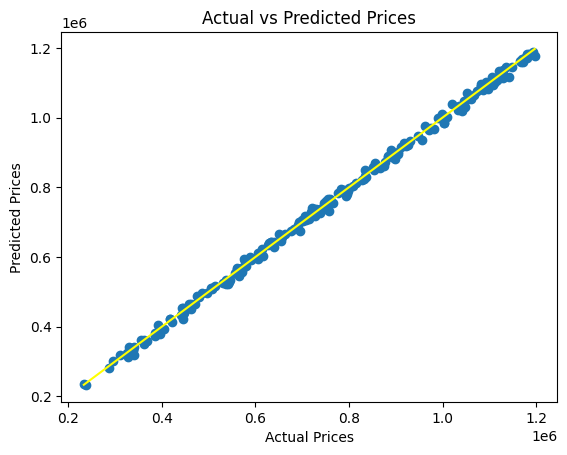

In [48]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='yellow')
plt.show()

# 5. Report

In [49]:
report = """ This project was able to showcase the entire process of creating
a linear regression model, from data preprocessing to evaluation. Key
challenges included handling missing data and ensuring proper normalization,
which were addressed through systematic approaches. Overall, the results suggest
the model works reasonably well."""
print(report)

 This project was able to showcase the entire process of creating
a linear regression model, from data preprocessing to evaluation. Key 
challenges included handling missing data and ensuring proper normalization, 
which were addressed through systematic approaches. Overall, the results suggest 
the model works reasonably well.
